## SSM implementation (testing)

TEST - lily

#### general notes

- time series model (note for matplotlib animate visualization)
- "model" how a state space evolves over time
- each discrete time step ∆t corresponds to 1 input data (-> step method)


### prof suggestions

- tweak the $A$ matrix (i.e. padding certian positions with 0 to see which structures are more important than others, or pad 0s at 1,1, or n,n positions of the matrix to see something about long-range dependency)
- possibly include stuff on matrix conditioning? (perfectly-conditioned matrix = unitary)

#### other notes

- explore how linear dynamics/physical systems are reflected by the SSM (S4)
- maybe tweaking $A$ will give us a general idea of how RNN is different from SSM
- if time permits, implement RNN from scratch and explain how the hidden state is processed diffferently

Daniel from gc:
- ...it is similar in format from an RNN except the hidden matrix in RNN is non linear and only trained by gradient descent, whereas state space model like reflects linear dynamics / a more physical system and is more structured 

In [236]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from Training.generator_prevbit import make_train_test
from SSM.model import SimpleSSM

#### Model implementation

possible thigsn to cover:
- classification
- sklearn metrics
- dimensionality reduction
- cross-validation
- hyperparameter tuning


In [237]:
# Hyperparameters
n_train = 1000
n_test = 200
T = 10  # sequence length
state_dim = 8

# get train/test data
x_train, y_train, x_test, y_test = make_train_test(n_train=n_train, n_test=n_test, T=T)

In [238]:
# implementation

model = SimpleSSM(state_dim=state_dim, input_dim=1, output_dim=1, learn_A=True)

# training loop
n_epoch = 10
lr = 1e-2
train_losses = []

for epoch in range(n_epoch):
    total_loss = 0

    for i in range(n_train):
        u = x_train[i]          # shape (T, 1)
        target = y_train[i]     # shape (T, 1)

        loss, grads = model.loss_and_grads(u, target)
        model.step(grads, lr=lr)
        total_loss += loss

    avg_loss = total_loss / n_train
    train_losses.append(avg_loss)

    print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}')

Epoch 1, Loss: 0.6259
Epoch 2, Loss: 0.2738
Epoch 3, Loss: 0.1689
Epoch 4, Loss: 0.1538
Epoch 5, Loss: 0.1488
Epoch 6, Loss: 0.1462
Epoch 7, Loss: 0.1447
Epoch 8, Loss: 0.1437
Epoch 9, Loss: 0.1429
Epoch 10, Loss: 0.1424


In [239]:
# evaluate model on test data
test_loss = 0
test_losses = []

for i in range(n_test):
    u = x_test[i]
    target = y_test[i]
    loss,_ = model.loss_and_grads(u, target)    # only need loss
    # print(loss)
    test_losses.append(loss)
    test_loss += loss

print(f'Test loss: {test_loss / n_test:.4f}')

Test loss: 0.1425


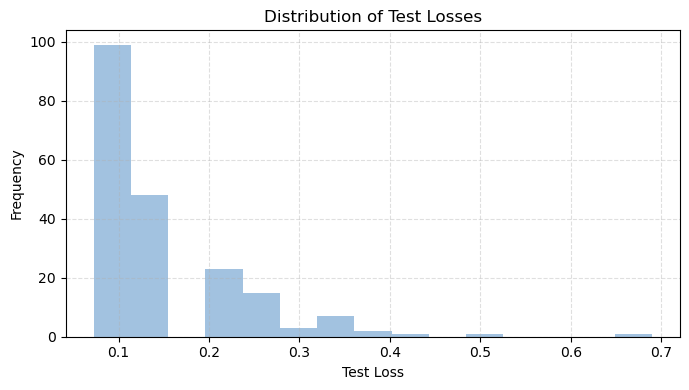

In [240]:
plt.figure(figsize=(7, 4))
plt.hist(test_losses, bins=15, color="#A2C2E0")
plt.title("Distribution of Test Losses")
plt.xlabel("Test Loss")
plt.ylabel("Frequency")
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

Most predictions are accurate - low loss -> predicted outputs were close to actual targets

only a few test cases were harder for the model and gave higher error (rightmost bars)

overall good result. model perfoms well on most test data

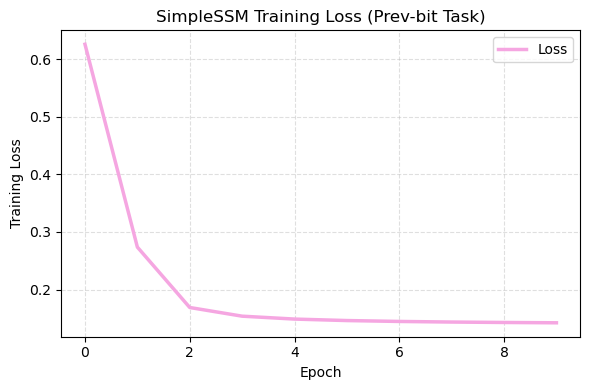

In [241]:
# visualziatoin

plt.figure(figsize=(6,4))
plt.plot(train_losses, color='#F5A6E1', linewidth=2.5, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('SimpleSSM Training Loss (Prev-bit Task)')
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.legend()
plt.show()

#### Model visualization

ideas to start off w/ (in-progress):

- plot loss function over iterations
- visualize parameter updates
- matplotlib/seaborn
    - attention heatmaps (extract attension weights from model + plot)
- Model architecture/internal states
    - Inspectus: used for ML visualization, explore model internals
    - or just matplotlib (e.g. check activation patterns across model layers/components)
- efficiency-focused visualizations
    - LTSF-Linear: visualization of weights after training, get insight to predicted values
    - OptimusPy: (check what this is)
    - PPT (Token Pruning & Pooling Transformers): (check what this is)

NOTE: We could do similar thing as Gu's Figure 2 (trained S4 model on LRA Path-X, where SSM convolution kernels are reshaped into a 128x128 image)

In [242]:
# visualiation